In [728]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset collected from The world Development Indicators
source: https://databank.worldbank.org/source/world-development-indicators#


In [729]:
# loading the dataset
df = pd.read_csv('../Dataset/word_development_indicators.csv')
df.head() 

,Country Code,Series Name,2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,USA,GDP (current US$),1.05819E+13,1.09291E+13,1.14565E+13,1.22172E+13,1.30392E+13,1.38156E+13,1.44742E+13,1.47699E+13,...,1.76081E+13,1.8295E+13,1.88049E+13,1.96121E+13,2.06565E+13,2.154E+13,2.13541E+13,2.36812E+13,2.60069E+13,2.77207E+13
1,USA,"Labor force, total",147675633,148643435,149387480,150620242,152553292,154659557,155984236,157693229,...,159771895,160854617,162663672,164208490,165560920,167362601,165890228,166395605,168341090,170715034
2,USA,"Inflation, consumer prices (annual %)",2.826171119,1.586031627,2.270094973,2.677236693,3.392746845,3.225944101,2.852672482,3.839100297,...,1.622222977,0.118627136,1.261583206,2.130110004,2.442583297,1.812210075,1.233584396,4.697858864,8.002799821,4.116338384
3,USA,"Life expectancy at birth, total (years)",76.83658537,76.93658537,77.03658537,77.48780488,77.48780488,77.68780488,77.98780488,78.03902439,...,78.84146341,78.6902439,78.53902439,78.53902439,78.63902439,78.78780488,76.9804878,76.32926829,77.43414634,..
4,USA,"Unemployment, total (% of total labor force) (...",4.731,5.783,5.989,5.529,5.084,4.623,4.622,5.784,...,6.168,5.28,4.869,4.355,3.896,3.669,8.055,5.349,3.65,3.638


## Transforming the gdp dataset and renaming columns

In [730]:
df.columns

Index(['Country Code', 'Series Name', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]',
       '2023 [YR2023]'],
      dtype='object')

In [731]:
df = df.melt(id_vars=['Country Code', 'Series Name'], var_name='Year', value_name='Value')
df.head(3)

,Country Code,Series Name,Year,Value
0,USA,GDP (current US$),2001 [YR2001],1.05819E+13
1,USA,"Labor force, total",2001 [YR2001],147675633
2,USA,"Inflation, consumer prices (annual %)",2001 [YR2001],2.826171119


In [732]:
type(df)

pandas.core.frame.DataFrame

In [733]:
df =  df.pivot(index=['Country Code', 'Year'], columns= 'Series Name', values='Value').reset_index()
df.head(3)

Series Name,Country Code,Year,"Central government debt, total (% of GDP)",Control of Corruption: Estimate,Exports of goods and services (current US$),GDP (current US$),GDP growth (annual %),Imports of goods and services (current US$),"Inflation, consumer prices (annual %)","Intentional homicides (per 100,000 people)",Interest payments (% of expense),Interest payments (% of revenue),"Labor force, total","Life expectancy at birth, total (years)",Military expenditure (current USD),"Population, total",Real interest rate (%),Refugee population by country or territory of asylum,"Unemployment, total (% of total labor force) (national estimate)"
0,BRA,2001 [YR2001],..,..,69279555096,5.59984E+11,1.389896401,81559232850,6.840359025,26.90898025,..,..,80543699,70.195,10930231568,176301203,45.63781871,2877,10.649
1,BRA,2002 [YR2002],..,0.081942312,72546876638,5.09795E+11,3.053461859,68250204101,8.450164377,27.54372392,..,..,83316348,70.41,9664561903,178503484,48.34043745,3176,10.641
2,BRA,2003 [YR2003],..,0.090239018,84744257516,5.58234E+11,1.140828998,72344866165,14.71491972,27.96046754,..,..,84788363,70.72,8392905884,180622688,46.44739884,3190,11.169


In [734]:
type(df)

pandas.core.frame.DataFrame

In [735]:
df.columns

Index(['Country Code', 'Year', 'Central government debt, total (% of GDP)',
       'Control of Corruption: Estimate',
       'Exports of goods and services (current US$)', 'GDP (current US$)',
       'GDP growth (annual %)', 'Imports of goods and services (current US$)',
       'Inflation, consumer prices (annual %)',
       'Intentional homicides (per 100,000 people)',
       'Interest payments (% of expense)', 'Interest payments (% of revenue)',
       'Labor force, total', 'Life expectancy at birth, total (years)',
       'Military expenditure (current USD)', 'Population, total',
       'Real interest rate (%)',
       'Refugee population by country or territory of asylum',
       'Unemployment, total (% of total labor force) (national estimate)'],
      dtype='object', name='Series Name')

In [736]:
columns = ['CountryCode', 'Year', 'GovDebtGDP', 'CorruptionControl', 'Exports', 'GDP', 'GDPGrowth',
           'Imports', 'InflationRate', 'HomicidesRate', 'InterestExpense', 'InterestRevenue', 'LaborForce',
           'LifeExpectancy', 'MilitarySpend', 'Population', 'RealInterestRate', 'RefugeePop', 'UnemploymentRate']
df.columns = columns
df.head()

,CountryCode,Year,GovDebtGDP,CorruptionControl,Exports,GDP,GDPGrowth,Imports,InflationRate,HomicidesRate,InterestExpense,InterestRevenue,LaborForce,LifeExpectancy,MilitarySpend,Population,RealInterestRate,RefugeePop,UnemploymentRate
0,BRA,2001 [YR2001],..,..,69279555096,5.59984E+11,1.389896401,81559232850,6.840359025,26.90898025,..,..,80543699,70.195,10930231568,176301203,45.63781871,2877,10.649
1,BRA,2002 [YR2002],..,0.081942312,72546876638,5.09795E+11,3.053461859,68250204101,8.450164377,27.54372392,..,..,83316348,70.41,9664561903,178503484,48.34043745,3176,10.641
2,BRA,2003 [YR2003],..,0.090239018,84744257516,5.58234E+11,1.140828998,72344866165,14.71491972,27.96046754,..,..,84788363,70.72,8392905884,180622688,46.44739884,3190,11.169
3,BRA,2004 [YR2004],..,-0.027268711,1.10739E+11,6.69289E+11,5.759964637,87894373255,6.5971851,26.19828106,..,..,87100090,71.131,9780111585,182675143,43.77915272,3333,10.072
4,BRA,2005 [YR2005],..,-0.15374814,1.35919E+11,8.91634E+11,3.202132061,1.05596E+11,6.869537209,25.47841509,..,..,89598384,71.753,13588619736,184688101,44.63516886,3446,10.551


## Cleaning the gdp dataset

In [737]:
df['Year'] = df['Year'].str.split(' ', expand=True)[0]
df.head(2)

,CountryCode,Year,GovDebtGDP,CorruptionControl,Exports,GDP,GDPGrowth,Imports,InflationRate,HomicidesRate,InterestExpense,InterestRevenue,LaborForce,LifeExpectancy,MilitarySpend,Population,RealInterestRate,RefugeePop,UnemploymentRate
0,BRA,2001,..,..,69279555096,5.59984E+11,1.389896401,81559232850,6.840359025,26.90898025,..,..,80543699,70.195,10930231568,176301203,45.63781871,2877,10.649
1,BRA,2002,..,0.081942312,72546876638,5.09795E+11,3.053461859,68250204101,8.450164377,27.54372392,..,..,83316348,70.41,9664561903,178503484,48.34043745,3176,10.641


In [738]:
# check for duplicates
df.duplicated().sum()

0

In [739]:
df.shape

(230, 19)

In [740]:
df.isna().sum()

CountryCode          0
Year                 0
GovDebtGDP           0
CorruptionControl    0
Exports              0
GDP                  0
GDPGrowth            0
Imports              0
InflationRate        0
HomicidesRate        0
InterestExpense      0
InterestRevenue      0
LaborForce           0
LifeExpectancy       0
MilitarySpend        0
Population           0
RealInterestRate     0
RefugeePop           0
UnemploymentRate     0
dtype: int64

In [741]:
df.replace('..', np.nan, inplace=True)
df.head(2)

,CountryCode,Year,GovDebtGDP,CorruptionControl,Exports,GDP,GDPGrowth,Imports,InflationRate,HomicidesRate,InterestExpense,InterestRevenue,LaborForce,LifeExpectancy,MilitarySpend,Population,RealInterestRate,RefugeePop,UnemploymentRate
0,BRA,2001,NaN,NaN,69279555096,5.59984E+11,1.389896401,81559232850,6.840359025,26.90898025,NaN,NaN,80543699,70.195,10930231568,176301203,45.63781871,2877,10.649
1,BRA,2002,NaN,0.081942312,72546876638,5.09795E+11,3.053461859,68250204101,8.450164377,27.54372392,NaN,NaN,83316348,70.41,9664561903,178503484,48.34043745,3176,10.641


In [742]:
((df.isna().sum() / len(df)) * 100).round(2)

CountryCode           0.00
Year                  0.00
GovDebtGDP           36.96
CorruptionControl     4.35
Exports               0.00
GDP                   0.00
GDPGrowth             0.00
Imports               0.00
InflationRate         0.00
HomicidesRate        12.61
InterestExpense      17.39
InterestRevenue      19.57
LaborForce            0.00
LifeExpectancy        4.35
MilitarySpend         4.35
Population            0.00
RealInterestRate     30.43
RefugeePop            0.00
UnemploymentRate      8.26
dtype: float64

In [743]:
df.drop(columns=['RealInterestRate', 'GovDebtGDP'], inplace=True)

In [745]:
df.isna().sum()

CountryCode           0
Year                  0
CorruptionControl    10
Exports               0
GDP                   0
GDPGrowth             0
Imports               0
InflationRate         0
HomicidesRate        29
InterestExpense      40
InterestRevenue      45
LaborForce            0
LifeExpectancy       10
MilitarySpend        10
Population            0
RefugeePop            0
UnemploymentRate     19
dtype: int64

In [746]:
df.shape

(230, 17)

In [747]:
df.dtypes

CountryCode          object
Year                 object
CorruptionControl    object
Exports              object
GDP                  object
GDPGrowth            object
Imports              object
InflationRate        object
HomicidesRate        object
InterestExpense      object
InterestRevenue      object
LaborForce           object
LifeExpectancy       object
MilitarySpend        object
Population           object
RefugeePop           object
UnemploymentRate     object
dtype: object

In [748]:
df.head(3)

,CountryCode,Year,CorruptionControl,Exports,GDP,GDPGrowth,Imports,InflationRate,HomicidesRate,InterestExpense,InterestRevenue,LaborForce,LifeExpectancy,MilitarySpend,Population,RefugeePop,UnemploymentRate
0,BRA,2001,NaN,69279555096,5.59984E+11,1.389896401,81559232850,6.840359025,26.90898025,NaN,NaN,80543699,70.195,10930231568,176301203,2877,10.649
1,BRA,2002,0.081942312,72546876638,5.09795E+11,3.053461859,68250204101,8.450164377,27.54372392,NaN,NaN,83316348,70.41,9664561903,178503484,3176,10.641
2,BRA,2003,0.090239018,84744257516,5.58234E+11,1.140828998,72344866165,14.71491972,27.96046754,NaN,NaN,84788363,70.72,8392905884,180622688,3190,11.169


In [749]:
df.columns

Index(['CountryCode', 'Year', 'CorruptionControl', 'Exports', 'GDP',
       'GDPGrowth', 'Imports', 'InflationRate', 'HomicidesRate',
       'InterestExpense', 'InterestRevenue', 'LaborForce', 'LifeExpectancy',
       'MilitarySpend', 'Population', 'RefugeePop', 'UnemploymentRate'],
      dtype='object')

In [750]:
# Convert columns to floa
df['CorruptionControl'] = df['CorruptionControl'].astype('float')
df['Exports'] = df['Exports'].astype('float')
df['GDP'] = df['GDP'].astype('float')
df['GDPGrowth'] = df['GDPGrowth'].astype('float')
df['Imports'] = df['Imports'].astype('float')
df['HomicidesRate'] = df['HomicidesRate'].astype('float')
df['InterestExpense'] = df['InterestExpense'].astype('float')
df['InterestRevenue'] = df['InterestRevenue'].astype('float')
df['LifeExpectancy'] = df['LifeExpectancy'].astype('float')
df['UnemploymentRate'] = df['UnemploymentRate'].astype('float')
df['InflationRate'] = df['InflationRate'].astype('float')
df['MilitarySpend'] = df['MilitarySpend'].astype('float')

# Convert columns to floa
df['Year'] = df['Year'].astype('int')
df['LaborForce'] = df['LaborForce'].astype('int')
df['Population'] = df['Population'].astype('int')
df['RefugeePop'] = df['RefugeePop'].astype('int')

In [ ]:
# Ensure the selected columns are numeric
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Forward interpolation
df.iloc[:, 1:] = df.iloc[:, 1:].interpolate(method='linear', limit_direction='forward', axis=0)

# Backward interpolation
df.iloc[:, 1:] = df.iloc[:, 1:].interpolate(method='linear', limit_direction='backward', axis=0)

In [759]:
df.shape

(230, 17)

In [760]:
df.head(3)

,CountryCode,Year,CorruptionControl,Exports (in billions),GDP (in trillions),GDPGrowth,Imports (in billions),InflationRate,HomicidesRate,InterestExpense,InterestRevenue,LaborForce (in millions),LifeExpectancy,MilitarySpend (in billions),Population (in millions),RefugeePop (in thousands),UnemploymentRate
0,BRA,2001,0.08,6.93,5.60,1.39,8.16,6.84,26.91,22.82,24.16,80.54,70.19,10.93,17.63,28.77,10.65
1,BRA,2002,0.08,7.25,5.10,3.05,6.83,8.45,27.54,22.82,24.16,83.32,70.41,9.66,17.85,31.76,10.64
2,BRA,2003,0.09,8.47,5.58,1.14,7.23,14.71,27.96,22.82,24.16,84.79,70.72,8.39,18.06,31.90,11.17


In [752]:
df.dtypes

CountryCode           object
Year                   int32
CorruptionControl    float64
Exports              float64
GDP                  float64
GDPGrowth            float64
Imports              float64
InflationRate        float64
HomicidesRate        float64
InterestExpense      float64
InterestRevenue      float64
LaborForce             int32
LifeExpectancy       float64
MilitarySpend        float64
Population             int32
RefugeePop             int32
UnemploymentRate     float64
dtype: object

In [753]:
df.describe()

,Year,CorruptionControl,Exports,GDP,GDPGrowth,Imports,InflationRate,HomicidesRate,InterestExpense,InterestRevenue,LaborForce,LifeExpectancy,MilitarySpend,Population,RefugeePop,UnemploymentRate
count,230.000000,230.000000,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,230.000000,230.000000,230.000000,230.000000,2.300000e+02,230.000000,2.300000e+02,2.300000e+02,2.300000e+02,230.000000
mean,2012.000000,0.879847,9.289373e+11,4.644343e+12,2.576566,9.581916e+11,2.795738,4.206079,10.745540,12.321231,1.719951e+08,78.189986,1.108974e+11,3.565357e+08,2.466165e+05,6.558987
std,6.647717,0.897552,7.204450e+11,5.213487e+12,3.611024,7.845780e+11,2.559152,7.266818,6.661103,8.635231,2.402102e+08,4.772792,1.901026e+11,4.871651e+08,3.032650e+05,2.569681
min,2001.000000,-0.617888,6.096342e+10,4.854400e+11,-10.296919,6.521828e+10,-1.352837,0.228709,0.865112,0.976158,1.658018e+07,63.091000,8.375571e+09,3.102086e+07,2.960000e+02,2.351000
25%,2006.000000,-0.021794,4.673755e+11,1.849130e+12,0.958611,4.799020e+11,1.228296,0.975211,6.150396,5.866757,2.984147e+07,76.226317,2.819675e+10,6.238410e+07,6.546700e+04,4.200000
50%,2012.000000,1.281744,7.339540e+11,2.677500e+12,2.100722,7.266855e+11,2.089990,1.456074,8.709337,10.382539,5.489849e+07,79.725854,4.507871e+10,1.041573e+08,1.846765e+05,6.171667
75%,2018.000000,1.668043,1.044042e+12,4.500902e+12,3.853745,1.086125e+12,3.758683,3.739985,12.801353,15.484705,1.584837e+08,81.654512,6.201585e+10,3.133041e+08,3.010220e+05,8.362000
max,2023.000000,2.061873,3.717890e+12,2.772070e+13,14.230861,3.976310e+12,14.714920,30.593037,31.627967,40.936291,7.829877e+08,84.560000,8.769430e+11,1.438070e+09,2.593007e+06,13.697000


In [754]:
df.CountryCode.describe()

count     230
unique     10
top       BRA
freq       23
Name: CountryCode, dtype: object

## Feature Engineering

In [755]:
# Feature Engineering

# Convert 'Exports' from its original scale to tens of billions (10^10)
df['Exports'] = df['Exports'] / 10000000000

# Convert 'GDP' from its original scale to hundreds of billions (10^11)
df['GDP'] = df['GDP'] / 100000000000

# Convert 'Imports' from its original scale to tens of billions (10^10)
df['Imports'] = df['Imports'] / 10000000000

# Convert 'LaborForce' from its original scale to millions (10^6)
df['LaborForce'] = df['LaborForce'] / 1000000

# Convert 'MilitarySpend' from its original scale to billions (10^9)
df['MilitarySpend'] = df['MilitarySpend'] / 1000000000

# Convert 'Population' from its original scale to tens of millions (10^7)
df['Population'] = df['Population'] / 10000000

# Convert 'RefugeePop' from its original scale to hundreds (10^2)
df['RefugeePop'] = df['RefugeePop'] / 100

In [756]:
df.rename(columns={
    'Exports': 'Exports (in billions)',
    'GDP': 'GDP (in trillions)',
    'Imports': 'Imports (in billions)',
    'LaborForce': 'LaborForce (in millions)',
    'MilitarySpend': 'MilitarySpend (in billions)',
    'Population': 'Population (in millions)',
    'RefugeePop': 'RefugeePop (in thousands)'
}, inplace=True)

In [757]:
df = df.apply(lambda x: round(x, 2))
df.head()

,CountryCode,Year,CorruptionControl,Exports (in billions),GDP (in trillions),GDPGrowth,Imports (in billions),InflationRate,HomicidesRate,InterestExpense,InterestRevenue,LaborForce (in millions),LifeExpectancy,MilitarySpend (in billions),Population (in millions),RefugeePop (in thousands),UnemploymentRate
0,BRA,2001,0.08,6.93,5.60,1.39,8.16,6.84,26.91,22.82,24.16,80.54,70.19,10.93,17.63,28.77,10.65
1,BRA,2002,0.08,7.25,5.10,3.05,6.83,8.45,27.54,22.82,24.16,83.32,70.41,9.66,17.85,31.76,10.64
2,BRA,2003,0.09,8.47,5.58,1.14,7.23,14.71,27.96,22.82,24.16,84.79,70.72,8.39,18.06,31.90,11.17
3,BRA,2004,-0.03,11.07,6.69,5.76,8.79,6.60,26.20,22.82,24.16,87.10,71.13,9.78,18.27,33.33,10.07
4,BRA,2005,-0.15,13.59,8.92,3.20,10.56,6.87,25.48,22.82,24.16,89.60,71.75,13.59,18.47,34.46,10.55


In [758]:
for label in cleaned_df.columns[:-1]:
    plt.scatter(cleaned_df[label], cleaned_df['GDP_Per_Capita'])
    plt.title(label)
    plt.ylabel('gdp per capita')
    plt.xlabel(label)
    plt.show()

NameError: name 'cleaned_df' is not defined

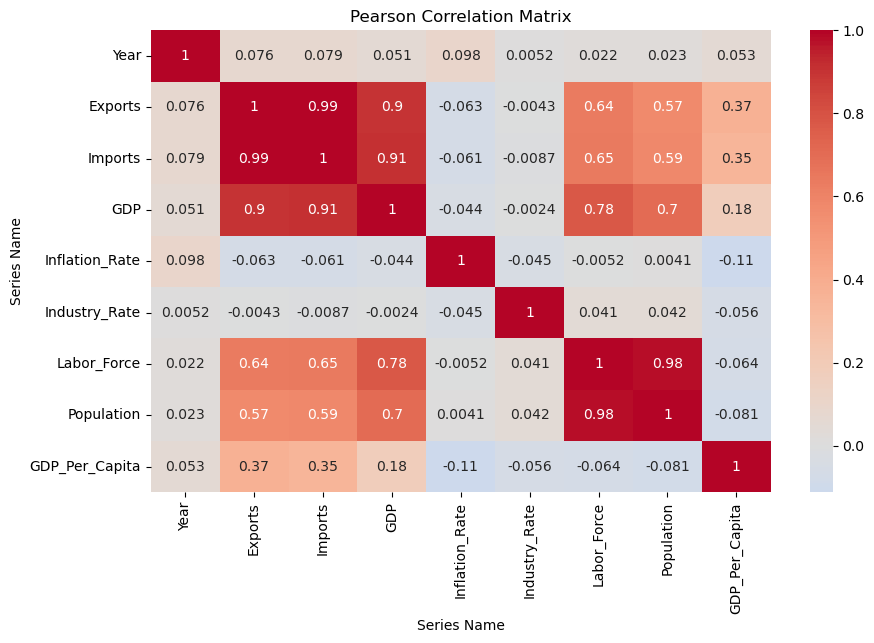

In [996]:
# Pearson correlation
pearson_corr = cleaned_df.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [997]:
cleaned_df = cleaned_df[['Year', 'Exports', 'Industry_Rate', 'Population', 'GDP_Per_Capita']].reset_index(drop=True)

In [998]:
cleaned_df[['Year', 'Exports', 'Industry_Rate', 'Population', 'GDP_Per_Capita']] = cleaned_df[['Year', 'Exports', 'Industry_Rate', 'Population', 'GDP_Per_Capita']].astype(int)
cleaned_df.tail()

Series Name,Year,Exports,Industry_Rate,Population,GDP_Per_Capita
2228,2018,-2147483648,4,15052184,2269
2229,2019,-2147483648,-9,15354608,1422
2230,2020,-2147483648,-8,15669666,1373
2231,2021,-2147483648,6,15993524,1774
2232,2022,-2147483648,5,16320537,1677


In [999]:
cleaned_df.describe()

Series Name,Year,Exports,Industry_Rate,Population,GDP_Per_Capita
count,2233.000000,2.233000e+03,2233.000000,2.233000e+03,2233.000000
mean,2015.754142,-1.697512e+09,2.652485,4.367456e+07,15384.326467
std,4.232069,1.112861e+09,11.425862,1.590665e+08,21392.197879
min,2009.000000,-2.147484e+09,-77.000000,1.049510e+05,200.000000
25%,2012.000000,-2.147484e+09,-1.000000,3.371133e+06,1974.000000
50%,2016.000000,-2.147484e+09,3.000000,9.893082e+06,5776.000000
75%,2019.000000,-2.147484e+09,6.000000,3.082154e+07,19186.000000
max,2023.000000,2.133433e+09,223.000000,1.428628e+09,133712.000000


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

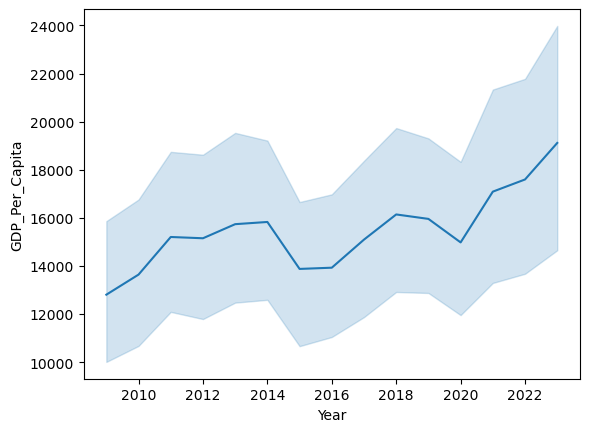

In [1000]:
sns.lineplot(data=cleaned_df, x='Year', y='GDP_Per_Capita')

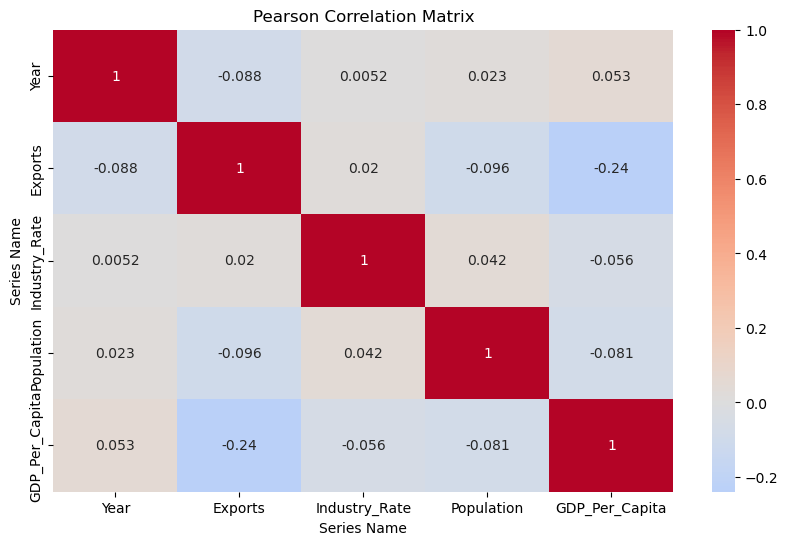

In [1001]:
# Pearson correlation
# Calculate the correlation matrix
pearson_corr = cleaned_df.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [1002]:
# define the target variable
y = cleaned_df['GDP_Per_Capita']

# define the features
X = cleaned_df.drop(['GDP_Per_Capita'], axis=1)

## Machine Learning

In [1003]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import root_mean_squared_error, r2_score

# Scale the features
scaler = PowerTransformer()
X = scaler.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2
)


In [1004]:
# display the results of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1786, 4), (447, 4), (1786,), (447,))

In [1005]:
# Visual Evaluation
def visual_evaluation(y_test, y_pred):
    residuals = y_test - y_pred  # Residuals
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

## Multi Linear Model

In [1006]:
from sklearn.linear_model import LinearRegression

# Build the model
lr_model = LinearRegression()

# Train the model 
lr_model.fit(X_train, y_train)

## make precdictions
y_pred = lr_model.predict(X_test)

In [1007]:
# Visual Evaluation
# visual_evaluation(y_test, y_pred)

In [1008]:
lr_rmse = round(root_mean_squared_error(y_test, y_pred), 2)
lr_r2 = round(r2_score(y_test, y_pred), 2)

print('rmse: ', lr_rmse)
print('r_square: ', lr_r2)

# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train, y_train, cv=5, scoring='r2')

# # plot the learning curve
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
# plt.xlabel('Train_sizes')
# plt.title('Linear Regression Regression Learning Curves')
# plt.legend()
plt.show()

rmse:  20352.83
r_square:  0.12


## Lasso Regression

In [1009]:
from sklearn.linear_model import Lasso

# Build a Lasso regression model
lasso_model = Lasso()

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

In [1010]:
# Evaluate the model
lasso_rmse = root_mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

# # output result
print(f'root_mean_squared_error: {lasso_rmse}')
print(f'root square: {lasso_r2}')

# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(lasso_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# # plot the learning curve
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
# plt.xlabel('Train_sizes')
# plt.title('Lasso Regression Learning Curves')
# plt.legend()
# plt.show()

root_mean_squared_error: 20269.66100032856
root square: 0.12975934631573582


## Ridge Regression 

In [1011]:
from sklearn.linear_model import Ridge

# Train the model 
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_rmse = root_mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

# output result
print(f'root_mean_squared_error: {ridge_rmse}')
print(f'root square: {ridge_r2}')

# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(ridge_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# # plot the learning curve
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
# plt.xlabel('Train_sizes')
# plt.title('Ridge Regression Learning Curves')
# plt.legend()
# plt.show()

root_mean_squared_error: 20269.69187182096
root square: 0.1297566954921049


# Elastic Net Regression

In [1012]:
from sklearn.linear_model import ElasticNet

# Build a Elastic Net regression model
en_model = ElasticNet(max_iter=10000, alpha=1.0)

# Train the model
en_model.fit(X_train, y_train)


# # make predictions
y_pred = en_model.predict(X_test)

# Evaluate the model
en_rmse = root_mean_squared_error(y_test, y_pred)
en_r2 = r2_score(y_test, y_pred)

# output result
print(f'root_mean_squared_error: {en_rmse}')
print(f'root square: {en_r2}')

# # Learning curve
# train_sizes, train_scores, test_scores = learning_curve(en_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
# # plot the learning curve
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
# plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation')
# plt.xlabel('Train_sizes')
# plt.title('Elastic Net Regression Learning Curves')
# plt.legend()
# plt.show()

root_mean_squared_error: 20577.04312914878
root square: 0.1031654463671291


In [1013]:
# # Create a DataFrame with the evaluation metrics
# results = pd.DataFrame({
#     'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet Regression', 'Ridge Regression'],
#     'RMSE': [linear_rmse, lasso_rmse, elastic_net_rmse, ridge_rmse],
#     'R2': [linear_r2, lasso_r2, elastic_net_r2, ridge_r2]
# })
# results
